In [47]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

lesson_df = pd.read_excel('data_files/initial_full_stat_days.xlsx', sheet_name='competition_cols')
years = list(lesson_df['YEAR'].unique())
all_columns = list(lesson_df.columns)[1:]
gr_columns = list(lesson_df.columns)[11:]
lesson_df = lesson_df.loc[:, all_columns]
lesson_df['ordinal'] = lesson_df['DATE'].dt.strftime("%j").astype(int)

top_priority_mask = ['REGIME', 'SLEEP', 'MEDITAITON', 'BREATH', 'CTRAINING', 'MORNING', 'SPORT_TIME', 'STRENGHT_POINTS', 'OUTSIDE', 'EYES', 'QL', 'QO', 'PNW','ALW', 'WRITING', 'READING', 'LISTENING', 'SPEAK_ENG',
       'TEST_ENG', 'TOTAL_SPA', 'TOTAL_DUT', 'IQ', 'PROF', 'PRIOR', 'MEETS','DIFFICULT', 'ROUTINE', 'PAID_WORK']

def get_key(d, value):
    for k,v in d.items():
        if v == value:
            return k


In [67]:
list_of_df = []
for year in years:
    temp = lesson_df.loc[lesson_df.YEAR == year, :]
    for col in top_priority_mask:
        temp[col] = temp[col].cumsum()
    list_of_df.append(temp)

new_df = pd.concat(list_of_df)

/var/folders/k0/5mz4jdsj64n5f2jltclyq9zh0000gn/T/ipykernel_35488/557311803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[col] = temp[col].cumsum()


In [72]:
import matplotlib.gridspec as gridspec

/Users/aleksejgukov/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


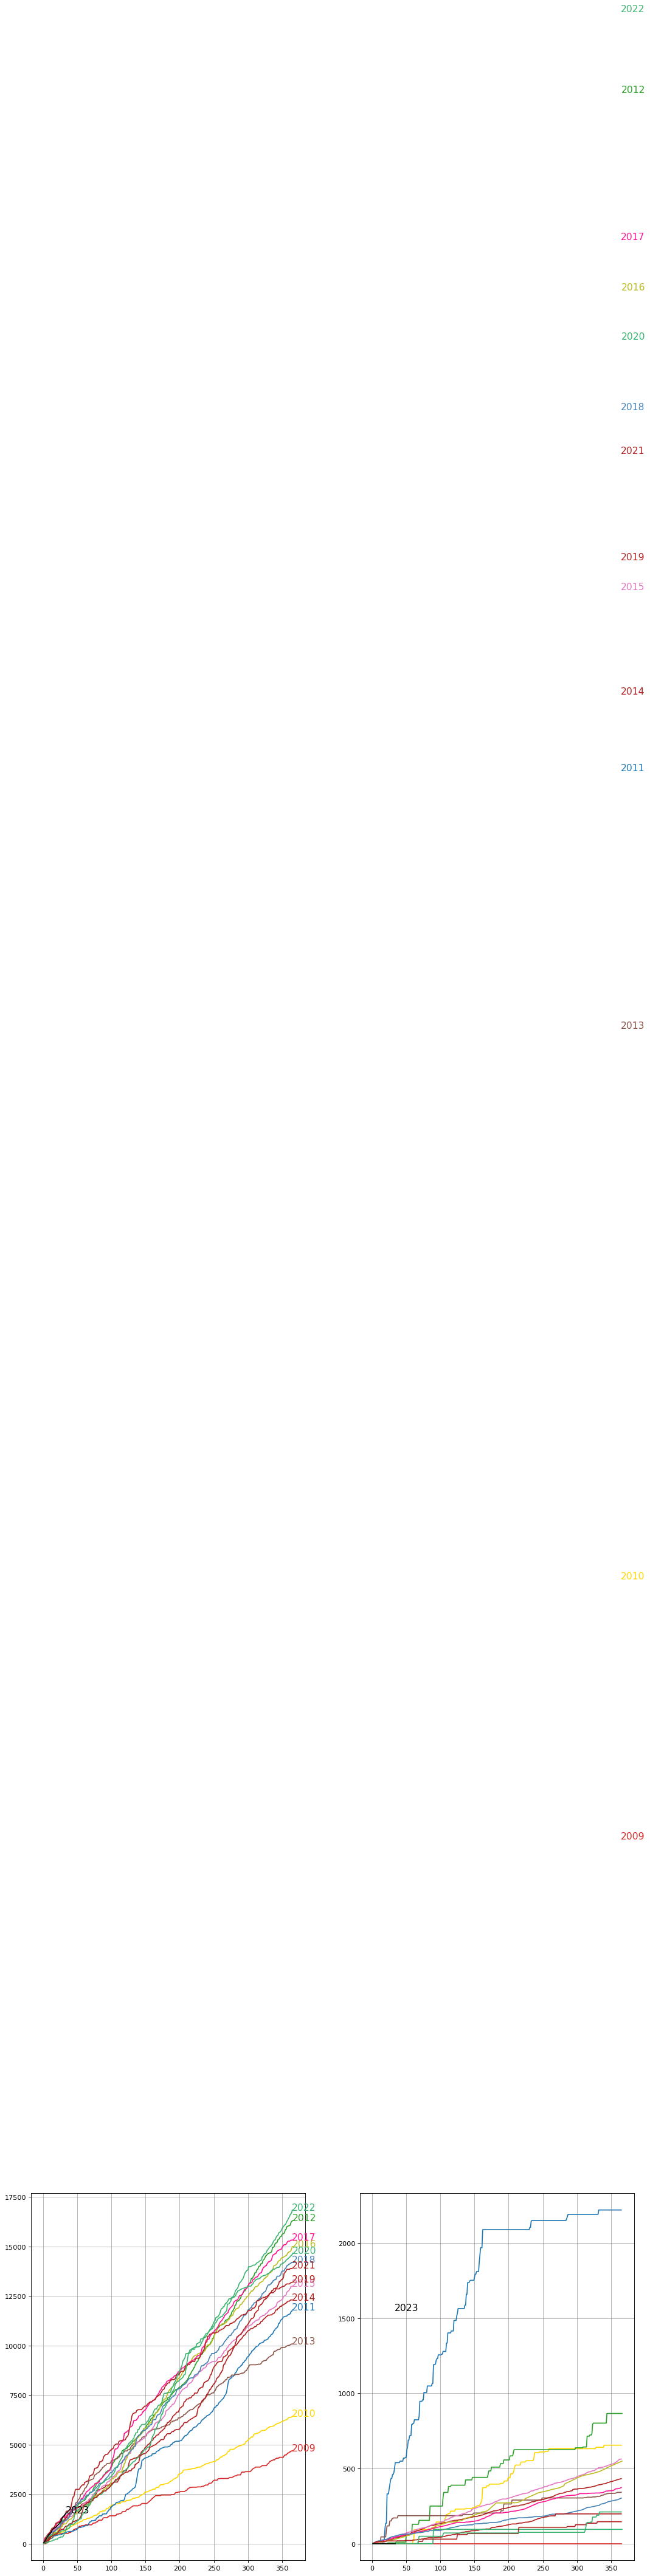

In [77]:
#mask = lesson_df['YEAR'] == 2022
#temp = lesson_df[mask].reset_index(drop=True)
#for col in top_priority_mask:
#    lesson_df[col] = lesson_df[col].cumsum()


#plt.figure(figsize=(16, 10), dpi=80)
mycolors = ['tab:red', 'gold', 'tab:blue', 'tab:green', 'tab:brown', 'firebrick', 'tab:pink', 'tab:olive',
                'deeppink', 'steelblue', 'firebrick', 'mediumseagreen', 'firebrick', 'mediumseagreen', 'black']

fg = plt.figure(figsize=(16, 10), dpi=80, constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)
fig_ax_1 = fg.add_subplot(gs[0, 0])

column = 'SPORT_TIME'
for i, y in enumerate(years):
    plt.plot('ordinal', column, data=new_df.loc[new_df.YEAR == y, :], color=mycolors[i], label=y)
    
    plt.text(new_df.loc[new_df.YEAR == y, :].shape[0] - .9, new_df.loc[new_df.YEAR == y, column][-1:].values[0], y, fontsize=14,
                 color=mycolors[i])
    plt.grid(color='grey', linestyle='-', linewidth=.5)

fig_ax_2 = fg.add_subplot(gs[0, 1])

column2 = 'TEST_ENG'
for i, y in enumerate(years):
    plt.plot('ordinal', column2, data=new_df.loc[new_df.YEAR == y, :], color=mycolors[i], label=y)
    
    plt.text(new_df.loc[new_df.YEAR == y, :].shape[0] - .9, new_df.loc[new_df.YEAR == y, column][-1:].values[0], y, fontsize=14,
                 color=mycolors[i])
    plt.grid(color='grey', linestyle='-', linewidth=.5)